In [1]:
import pandas as pd 


C:\Users\Abuzer\AppData\Local\Temp\ipykernel_8824\217833862.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Remove outlier using IQR

In [8]:
df_height = pd.read_csv("heights.csv")

df_height.dtypes

name       object
height    float64
dtype: object

In [9]:
df_height.head(5)

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [11]:
# find q1 and q3 
Q1 , Q3  = df_height.height.quantile([0.25 , 0.75])
Q1 , Q3

(5.3500000000000005, 6.275)

In [12]:
IQR = Q3 - Q1 
IQR

0.9249999999999998

In [14]:
lower_limit = Q1 - 1.5*IQR
lower_limit

3.962500000000001

In [15]:
Higher_limit = Q3 + 1.5*IQR
Higher_limit

7.6625

In [22]:
df_height[(df_height.height < lower_limit) | (df_height.height > Higher_limit)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [26]:
# find outlier 
df_new = df_height[(df_height.height > lower_limit)&(df_height.height < Higher_limit)]
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


### Using box and whisker plot to remove outlier

In [28]:
df = pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [30]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [31]:
df.describe()

,Year,Sales
count,36.0,36.000000
mean,2022.0,23755.500000
std,0.0,9220.861824
min,2022.0,9665.000000
25%,2022.0,14523.750000
50%,2022.0,23836.000000
75%,2022.0,30358.000000
max,2022.0,38143.000000


In [67]:
df_apac = df[df["Region"] == "APAC"]
df_europe = df[df["Region"] == "Europe"]
df_Americas = df[df["Region"] == "Americas"]


In [80]:
def Lower_upper(data):
   Q1 ,Q3 = data.Sales.quantile([0.25 , 0.75])
   IQR = Q3 - Q1
   lower = Q1 - 1.5*IQR
   upper = Q3 + 1.5*IQR
   return lower , upper 

In [81]:
lower , upper = Lower_upper(df_europe)
lower , upper

(7306.875, 17665.875)

In [46]:
df_Americas.Sales.describe()

count       12.000000
mean     28356.750000
std       3610.368556
min      23407.000000
25%      24947.750000
50%      28770.500000
75%      30358.000000
max      34102.000000
Name: Sales, dtype: float64

In [48]:
df_europe.Sales.describe()

count       12.000000
mean     13147.583333
std       3549.568795
min       9665.000000
25%      11191.500000
50%      12044.000000
75%      13781.250000
max      23000.000000
Name: Sales, dtype: float64

In [82]:
df_europe[df_europe.Sales > upper ]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


In [84]:
labels = df["Region"].unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [85]:
plot_data = [df["Sales"][df["Region"] == label ].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)]

C:\Users\Abuzer\AppData\Local\Temp\ipykernel_8824\3928209785.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=labels, flierprops=dict(marker='o', color='red', markersize=8))


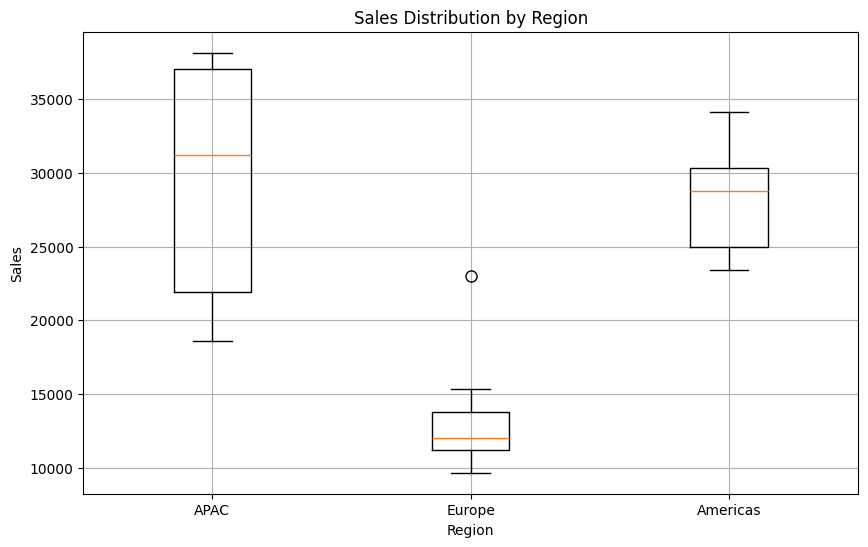

In [87]:
import matplotlib.pyplot as plt

# Assuming you already have plot_data and labels defined
plt.figure(figsize=(10, 6))
plt.boxplot(plot_data, labels=labels, flierprops=dict(marker='o', color='red', markersize=8))
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.grid(True)
plt.show()
